In [78]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [79]:
df_normalized = pd.read_hdf('data_normalized/assets.h5', key='engineered_features')

df_normalized.head()

return_1w  return_2w  return_3w  return_6w  return_12w  \
ticker date                                                                 
IYR    2001-01-07        NaN        NaN        NaN        NaN         NaN   
       2001-01-14        NaN        NaN        NaN        NaN         NaN   
       2001-01-21        NaN        NaN        NaN        NaN         NaN   
       2001-01-28        NaN        NaN        NaN        NaN         NaN   
       2001-02-04        NaN        NaN        NaN        NaN         NaN   

                   return_52w     Mkt-RF        SMB        HML       RMW  ...  \
ticker date                                                               ...   
IYR    2001-01-07         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-14         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-21         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-28         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-02-04         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   

                   natural_gas_diff  business_inventory_diff  \
ticker date                                                    
IYR    2001-01-07              0.29                   2051.0   
       2001-01-14              0.00                      0.0   
       2001-01-21              0.00                      0.0   
       2001-01-28              0.00                      0.0   
       2001-02-04              0.00                  -6345.0   

                   corporate_profits_diff  \
ticker date                                 
IYR    2001-01-07                  29.523   
       2001-01-14                   0.000   
       2001-01-21                   0.000   
       2001-01-28                   0.000   
       2001-02-04                   0.000   

                   semiconductor_electronics_manufacturing_diff  \
ticker date                                                       
IYR    2001-01-07                                           0.0   
       2001-01-14                                           0.0   
       2001-01-21                                           0.0   
       2001-01-28                                           0.0   
       2001-02-04                                          -0.4   

                   consumer_price_index_diff  M2_money_supply_diff  \
ticker date                                                          
IYR    2001-01-07                        1.0                  50.7   
       2001-01-14                        0.0                   0.0   
       2001-01-21                        0.0                   0.0   
       2001-01-28                        0.0                   0.0   
       2001-02-04                        0.4                  38.7   

                   10y_real_interest_rate_diff  new_homes_diff  \
ticker date                                                      
IYR    2001-01-07                    -0.387777            68.0   
       2001-01-14                     0.000000             0.0   
       2001-01-21                     0.000000             0.0   
       2001-01-28                     0.000000             0.0   
       2001-02-04                     0.015581            25.0   

                   streaming_media_consumption_diff gold_diff  
ticker date                                                    
IYR    2001-01-07                               0.5       1.9  
       2001-01-14                               0.0       0.0  
       2001-01-21                               0.0       0.0  
       2001-01-28                               0.0       0.0  
       2001-02-04                               1.1      -1.9  

[5 rows x 96 columns]

In [80]:
def pca_analysis(weekly_returns):
    # Excluimos todos los targets
    features = weekly_returns.select_dtypes(include=["float64", "int64"]).drop(
        columns=[col for col in weekly_returns.columns if "target_" in col]
    )
    # Separamos los datos hasta 2020 para entrenamiento
    mask_2020 = features.index.get_level_values("date").year <= 2020
    features_train = features[mask_2020]

    # Estandarizamos los datos usando solo datos hasta 2020
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_scaled = scaler.transform(features)

    # Aplicamos PCA usando solo datos hasta 2020
    pca = PCA(n_components=50)  # Usamos 50 componentes principales
    # Primero imputamos con el valor anterior
    features_scaled_train = pd.DataFrame(features_scaled[mask_2020]).fillna(
        method="ffill"
    )
    # Si quedan nulos, imputamos con la media
    features_scaled_train = features_scaled_train.fillna(features_scaled_train.mean())
    pca.fit(features_scaled_train)

    # Imprimimos la varianza explicada
    varianza_explicada = pca.explained_variance_ratio_.cumsum()
    print(f"\nVarianza explicada acumulada con 50 componentes: {varianza_explicada[-1]:.2%}")

    # Transformamos todos los datos con el PCA entrenado
    features_scaled = np.nan_to_num(
        features_scaled, nan=np.nanmean(features_scaled[mask_2020])
    )
    features_pca = pca.transform(features_scaled)

    # Convertimos a DataFrame
    pca_cols = [f"PC{i+1}" for i in range(features_pca.shape[1])]
    features_pca_df = pd.DataFrame(features_pca, index=features.index, columns=pca_cols)

    # Añadimos el target original
    features_pca_df["sector"] = weekly_returns["sector"]
    features_pca_df["target_1w"] = weekly_returns["target_1w"]

    # Guardamos el resultado
    # save_data(features_pca_df, "engineered_features_pca")
    return features_pca_df, pca, features

features_pca_df, pca, features = pca_analysis(df_normalized)

features_pca_df.head()

pca.explained_variance_ratio_




Varianza explicada acumulada con 50 componentes: 96.70%


/tmp/ipykernel_144923/1988194607.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_scaled_train = pd.DataFrame(features_scaled[mask_2020]).fillna(


array([0.1656778 , 0.08872593, 0.06910927, 0.05680367, 0.04620778,
       0.04219952, 0.02974374, 0.028913  , 0.02578499, 0.02238005,
       0.02029815, 0.01861344, 0.01686842, 0.01639908, 0.01618739,
       0.01589656, 0.01396218, 0.01332332, 0.01328495, 0.01299168,
       0.01262425, 0.01222171, 0.01142513, 0.01103477, 0.01074347,
       0.01059747, 0.01006172, 0.00989464, 0.00953111, 0.00939678,
       0.00886918, 0.00845364, 0.00840558, 0.0079386 , 0.00774416,
       0.00752292, 0.00693711, 0.00670671, 0.00653441, 0.00636936,
       0.00621894, 0.00582987, 0.00579809, 0.00551144, 0.00513728,
       0.00478915, 0.00468716, 0.00459997, 0.00409322, 0.00393935])

In [81]:
features_pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'sector', 'target_1w'],
      dtype='object')

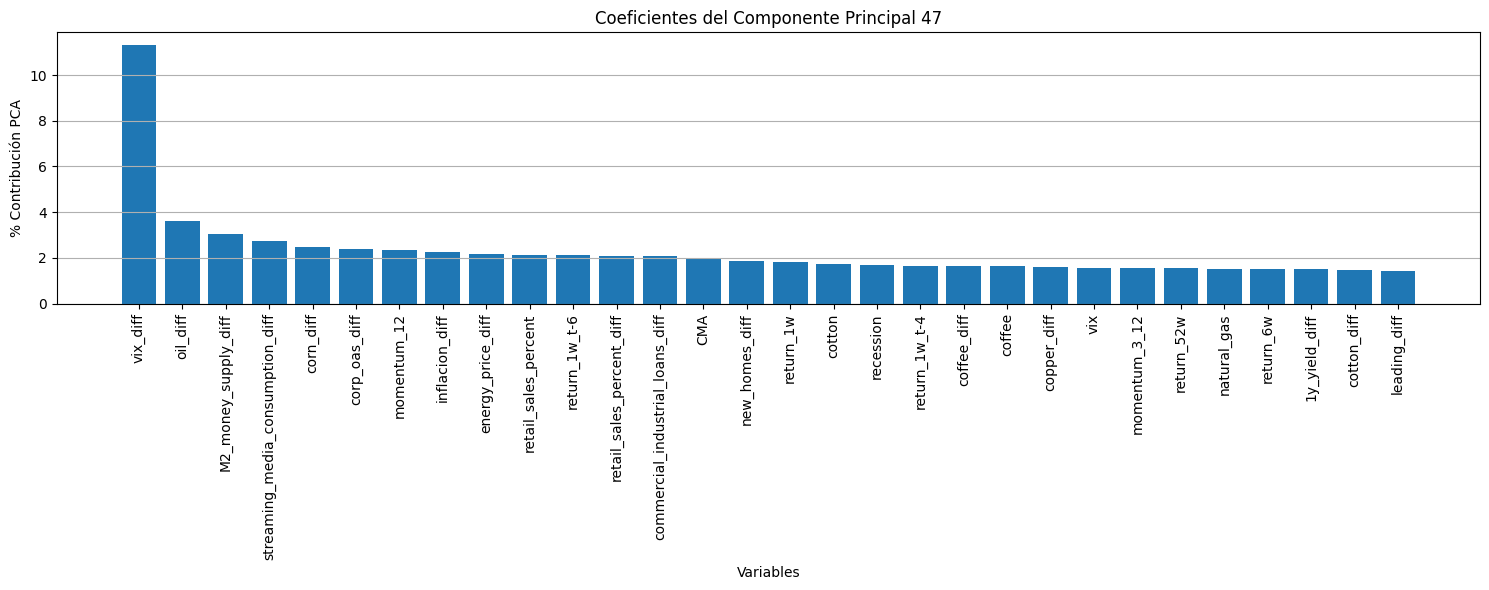

In [88]:
# Ordenar las columnas por contribución en valor absoluto
pca_contrib =100*np.abs(pca.components_[46]) / np.sum(np.abs(pca.components_[46]))

sorted_indices = np.argsort(pca_contrib)[::-1]
sorted_columns = features.columns[sorted_indices]
sorted_coefficients = pca_contrib[sorted_indices]

plt.figure(figsize=(15, 6))
plt.bar(sorted_columns[:30], sorted_coefficients[:30])
plt.xticks(rotation=90)
plt.title('Coeficientes del Componente Principal 47')
plt.xlabel('Variables')
plt.ylabel('% Contribución PCA')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [83]:
pca

PCA(n_components=50)

In [84]:
features

return_1w  return_2w  return_3w  return_6w  return_12w  \
ticker date                                                                 
IYR    2001-01-07        NaN        NaN        NaN        NaN         NaN   
       2001-01-14        NaN        NaN        NaN        NaN         NaN   
       2001-01-21        NaN        NaN        NaN        NaN         NaN   
       2001-01-28        NaN        NaN        NaN        NaN         NaN   
       2001-02-04        NaN        NaN        NaN        NaN         NaN   
...                      ...        ...        ...        ...         ...   
XLY    2024-12-01   0.809070   1.224426   0.826089   2.168042    3.622041   
       2024-12-08   1.982427   1.962504   2.226199   2.997293    3.274306   
       2024-12-15   0.471450   1.691482   1.906555   3.303057    2.964340   
       2024-12-22  -1.155353  -0.481571   0.716084   1.197505    2.081618   
       2024-12-29   0.832120  -0.230571   0.083895   1.774556    2.603640   

                   return_52w     Mkt-RF        SMB        HML       RMW  ...  \
ticker date                                                               ...   
IYR    2001-01-07         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-14         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-21         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-28         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-02-04         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
...                       ...        ...        ...        ...       ...  ...   
XLY    2024-12-01    3.420246 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-08    3.826297 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-15    3.466402 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-22    3.104590 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-29    3.510258 -28.444476 -33.007563  38.246440 -9.326239  ...   

                   natural_gas_diff  business_inventory_diff  \
ticker date                                                    
IYR    2001-01-07              0.29                   2051.0   
       2001-01-14              0.00                      0.0   
       2001-01-21              0.00                      0.0   
       2001-01-28              0.00                      0.0   
       2001-02-04              0.00                  -6345.0   
...                             ...                      ...   
XLY    2024-12-01              0.00                      0.0   
       2024-12-08              0.00                      0.0   
       2024-12-15              0.00                      0.0   
       2024-12-22              0.00                      0.0   
       2024-12-29              0.00                      0.0   

                   corporate_profits_diff  \
ticker date                                 
IYR    2001-01-07                  29.523   
       2001-01-14                   0.000   
       2001-01-21                   0.000   
       2001-01-28                   0.000   
       2001-02-04                   0.000   
...                                   ...   
XLY    2024-12-01                   0.000   
       2024-12-08                   0.000   
       2024-12-15                   0.000   
       2024-12-22                   0.000   
       2024-12-29                   0.000   

                   semiconductor_electronics_manufacturing_diff  \
ticker date                                                       
IYR    2001-01-07                                           0.0   
       2001-01-14                                           0.0   
       2001-01-21                                           0.0   
       2001-01-28                                           0.0   
       2001-02-04                                          -0.4   
...                                                         ...   
XLY    2

In [85]:
len(features)

13772

In [86]:
pca.components_[0]

array([-1.27164884e-02, -1.67826244e-02, -2.26691717e-02, -2.59150933e-02,
       -2.59874355e-02, -7.84571977e-02,  4.29944928e-02,  2.01032649e-02,
        5.16405080e-03,  3.57193386e-02,  4.83879004e-02, -5.43536950e-03,
       -1.13363435e-02, -1.32964959e-02, -1.39145790e-02, -6.91952431e-02,
       -6.68758863e-03, -1.08901614e-02, -1.67155111e-02, -3.32475521e-03,
        2.12883953e-03, -1.37038525e-02,  1.38426950e-02,  5.79933204e-02,
        6.91756248e-02,  4.00417590e-02,  9.64564122e-02,  1.19526286e-01,
        6.26974232e-03, -2.33130407e-01, -1.26243986e-01,  1.20452253e-01,
       -1.25075060e-01,  7.13463683e-02, -1.02025731e-02, -1.57940282e-02,
       -2.33996247e-01,  1.27169151e-01, -2.31899116e-01, -2.01315888e-01,
       -2.15622685e-01, -1.45741256e-01, -1.22442162e-01, -1.63097608e-01,
       -1.84626197e-01, -1.26237526e-01, -1.96418546e-01, -8.48286990e-02,
       -2.33657654e-01, -2.47907890e-01,  2.48071346e-01, -2.46516557e-01,
       -2.25904076e-01,  

In [87]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Asumiendo que X es tu matriz de datos
# pca = PCA()
# pca.fit(X)

# Crear un DataFrame con los coeficientes del primer componente
# Junto con los nombres de las variables originales
pc1_coef = pd.DataFrame(
    abs(pca.components_[0]),  # Tomamos valores absolutos para ver la magnitud
    index=df_normalized.loc[:,features].columns,  # Nombres de las variables originales
    columns=['PC1_coeficiente']
)

# Ordenar de mayor a menor importancia
pc1_coef_sorted = pc1_coef.sort_values('PC1_coeficiente', ascending=False)

# Mostrar las variables más importantes
print("Importancia de variables en el primer componente principal:")
print(pc1_coef_sorted)

ValueError: Cannot index with multidimensional key

In [12]:
features

return_1w  return_2w  return_3w  return_6w  return_12w  \
ticker date                                                                 
IYR    2001-01-07        NaN        NaN        NaN        NaN         NaN   
       2001-01-14        NaN        NaN        NaN        NaN         NaN   
       2001-01-21        NaN        NaN        NaN        NaN         NaN   
       2001-01-28        NaN        NaN        NaN        NaN         NaN   
       2001-02-04        NaN        NaN        NaN        NaN         NaN   
...                      ...        ...        ...        ...         ...   
XLY    2024-12-01   0.809070   1.224426   0.826089   2.168042    3.622041   
       2024-12-08   1.982427   1.962504   2.226199   2.997293    3.274306   
       2024-12-15   0.471450   1.691482   1.906555   3.303057    2.964340   
       2024-12-22  -1.155353  -0.481571   0.716084   1.197505    2.081618   
       2024-12-29   0.832120  -0.230571   0.083895   1.774556    2.603640   

                   return_52w     Mkt-RF        SMB        HML       RMW  ...  \
ticker date                                                               ...   
IYR    2001-01-07         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-14         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-21         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-01-28         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
       2001-02-04         NaN -18.186677 -23.632882  18.254006 -0.255327  ...   
...                       ...        ...        ...        ...       ...  ...   
XLY    2024-12-01    3.420246 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-08    3.826297 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-15    3.466402 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-22    3.104590 -28.444476 -33.007563  38.246440 -9.326239  ...   
       2024-12-29    3.510258 -28.444476 -33.007563  38.246440 -9.326239  ...   

                   natural_gas_diff  business_inventory_diff  \
ticker date                                                    
IYR    2001-01-07              0.29                   2051.0   
       2001-01-14              0.00                      0.0   
       2001-01-21              0.00                      0.0   
       2001-01-28              0.00                      0.0   
       2001-02-04              0.00                  -6345.0   
...                             ...                      ...   
XLY    2024-12-01              0.00                      0.0   
       2024-12-08              0.00                      0.0   
       2024-12-15              0.00                      0.0   
       2024-12-22              0.00                      0.0   
       2024-12-29              0.00                      0.0   

                   corporate_profits_diff  \
ticker date                                 
IYR    2001-01-07                  29.523   
       2001-01-14                   0.000   
       2001-01-21                   0.000   
       2001-01-28                   0.000   
       2001-02-04                   0.000   
...                                   ...   
XLY    2024-12-01                   0.000   
       2024-12-08                   0.000   
       2024-12-15                   0.000   
       2024-12-22                   0.000   
       2024-12-29                   0.000   

                   semiconductor_electronics_manufacturing_diff  \
ticker date                                                       
IYR    2001-01-07                                           0.0   
       2001-01-14                                           0.0   
       2001-01-21                                           0.0   
       2001-01-28                                           0.0   
       2001-02-04                                          -0.4   
...                                                         ...   
XLY    2